In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la conexión
server = r'FAMILIM\SQLEXPRESS'
database = 'ProyectoRiesgoBancario'

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

try:
    conn = pyodbc.connect(conn_str)
    print("✅ Conectado exitosamente a SQL Server desde Jupyter")
except Exception as e:
    print(f"❌ Error de conexión: {e}")

# Cargar los datos del semáforo en un DataFrame de Pandas
query = "SELECT * FROM Vista_Semaforo_Riesgo"
df = pd.read_sql(query, conn)

# Ver los datos directamente en Jupyter
df.head()

✅ Conectado exitosamente a SQL Server desde Jupyter


C:\Users\ignac\AppData\Local\Temp\ipykernel_20692\607953298.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,ClienteID,Ingreso_Anual,Monto_Prestamo,Grado_Riesgo,Semaforo_Decision
0,4,48000.0,20000.0,D,ROJO: Riesgo Crítico
1,4,48000.0,20000.0,D,ROJO: Riesgo Crítico
2,4,48000.0,16000.0,B,AMARILLO: Seguimiento
3,4,48000.0,1800.0,B,VERDE: Bajo Riesgo
4,4,48000.0,10000.0,A,VERDE: Bajo Riesgo


C:\Users\ignac\AppData\Local\Temp\ipykernel_20692\3037425682.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Semaforo_Decision', palette=colores, order=colores.keys())


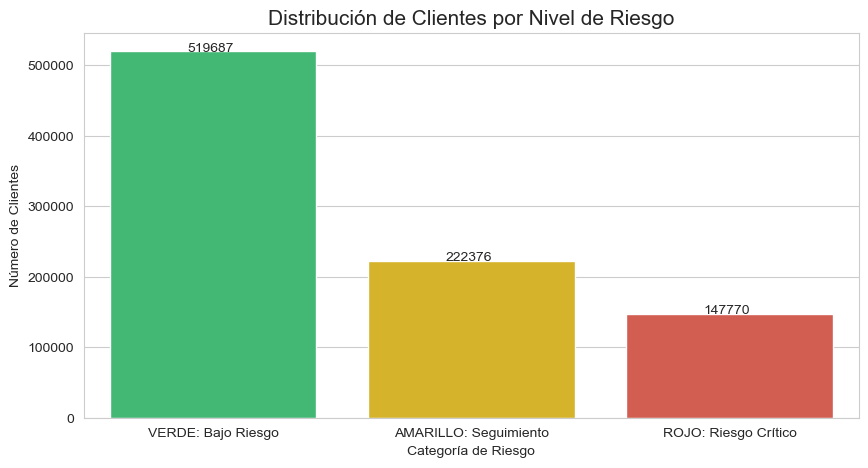

In [2]:
# Importamos para visualización
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Gráfica de Barras: Distribución del Semáforo
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Definimos los colores del banco
colores = {'VERDE: Bajo Riesgo': '#2ecc71', 
           'AMARILLO: Seguimiento': '#f1c40f', 
           'ROJO: Riesgo Crítico': '#e74c3c'}

ax = sns.countplot(data=df, x='Semaforo_Decision', palette=colores, order=colores.keys())

plt.title('Distribución de Clientes por Nivel de Riesgo', fontsize=15)
plt.ylabel('Número de Clientes')
plt.xlabel('Categoría de Riesgo')

# Añadir etiquetas de cantidad sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.3, p.get_height()+100))

plt.show()

C:\Users\ignac\AppData\Local\Temp\ipykernel_20692\4270597034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Semaforo_Decision', y='Monto_Prestamo', palette=colores)


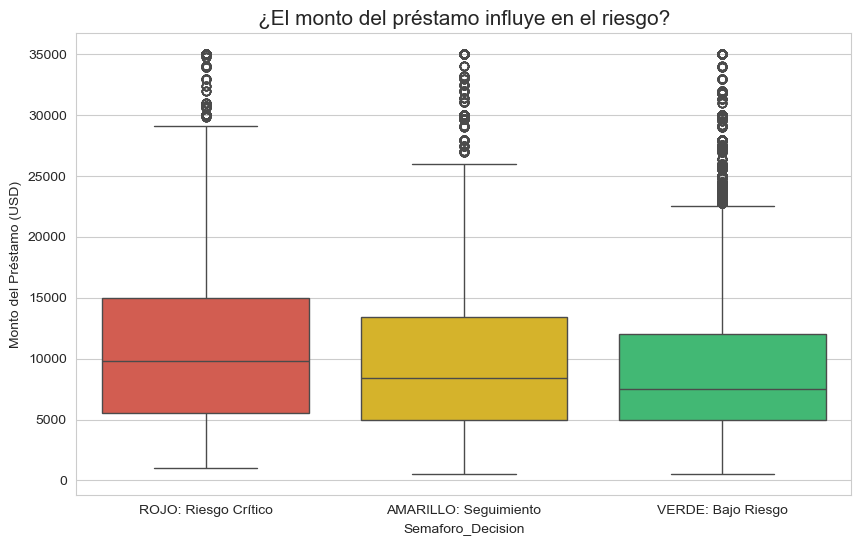

In [3]:
# 2. Boxplot: Monto del préstamo vs Nivel de Riesgo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Semaforo_Decision', y='Monto_Prestamo', palette=colores)

plt.title('¿El monto del préstamo influye en el riesgo?', fontsize=15)
plt.ylabel('Monto del Préstamo (USD)')
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Traemos los datos combinados de SQL para tener todo en un solo lugar
query_completa = """
SELECT c.Edad, c.Ingreso_Anual, p.Monto_Prestamo, p.Estado_Mora 
FROM Clientes c
JOIN Prestamos p ON c.ClienteID = p.ClienteID
"""
df_modelo = pd.read_sql(query_completa, conn)

# 2. Preparamos las variables (X = datos del cliente, y = si falló o no)
X = df_modelo[['Edad', 'Ingreso_Anual', 'Monto_Prestamo']]
y = df_modelo['Estado_Mora']

# 3. Entrenamos al "Cerebro" (Modelo de Regresión Logística)
modelo_riesgo = LogisticRegression()
modelo_riesgo.fit(X, y)

# 4. Calculamos la probabilidad numérica de incumplimiento
probabilidades = modelo_riesgo.predict_proba(X)[:, 1]
df_modelo['Probabilidad_Falla_%'] = (probabilidades * 100).round(2)

# Mostramos los resultados
print("Cálculo finalizado. Aquí están los perfiles con mayor probabilidad de riesgo:")
df_modelo.sort_values(by='Probabilidad_Falla_%', ascending=False).head(10)



from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Preparamos los datos
# X son nuestras variables predictoras, y es lo que queremos predecir (Estado_Mora)
X = df[['person_age', 'person_income', 'loan_amnt']] 
y = df['loan_status'] # 0 = Cumple, 1 = Falla

# 2. Entrenamos el modelo
modelo = LogisticRegression()
modelo.fit(X, y)

# 3. Calculamos la probabilidad para cada cliente en tu base de datos
# predict_proba nos da dos columnas: [probabilidad de 0, probabilidad de 1]
probabilidades = modelo.predict_proba(X)[:, 1] 

# 4. Agregamos el resultado a nuestro DataFrame
df['Probabilidad_Mora_%'] = (probabilidades * 100).round(2)

# Ver los clientes con mayor probabilidad de riesgo
df[['person_income', 'loan_amnt', 'Probabilidad_Mora_%']].sort_values(by='Probabilidad_Mora_%', ascending=False).head(10)

C:\Users\ignac\AppData\Local\Temp\ipykernel_20692\4183059698.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_modelo = pd.read_sql(query_completa, conn)


Cálculo finalizado. Aquí están los perfiles con mayor probabilidad de riesgo:


KeyError: "None of [Index(['person_age', 'person_income', 'loan_amnt'], dtype='object')] are in the [columns]"

In [6]:
import numpy as np

# 1. Definimos una función para evaluar riesgos rápidamente
def evaluar_cliente(edad, ingreso, prestamo):
    # El modelo espera los datos en el mismo orden que lo entrenamos: Edad, Ingreso, Monto
    datos_cliente = np.array([[edad, ingreso, prestamo]])
    
    # Calculamos la probabilidad (0 a 100)
    # Usamos el modelo_riesgo que entrenaste en el paso anterior
    prob = modelo_riesgo.predict_proba(datos_cliente)[:, 1] * 100
    
    print(f"--- RESULTADO DE LA EVALUACIÓN ---")
    print(f"Edad: {edad} años | Ingreso Anual: ${ingreso} | Préstamo: ${prestamo}")
    print(f"Probabilidad de Incumplimiento: {prob[0]:.2f}%")
    
    if prob[0] > 50:
        print("ESTADO: ❌ RECHAZADO (Riesgo Crítico)")
    elif prob[0] > 20:
        print("ESTADO: ⚠️ REVISIÓN MANUAL (Riesgo Medio)")
    else:
        print("ESTADO: ✅ APROBADO (Riesgo Bajo)")

# 2. ¡Probemos con un ejemplo! 
# Imagina un cliente joven de 22 años, que gana 20,000 pero pide 18,000
evaluar_cliente(22, 20000, 18000)

--- RESULTADO DE LA EVALUACIÓN ---
Edad: 22 años | Ingreso Anual: $20000 | Préstamo: $18000
Probabilidad de Incumplimiento: 84.05%
ESTADO: ❌ RECHAZADO (Riesgo Crítico)


C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


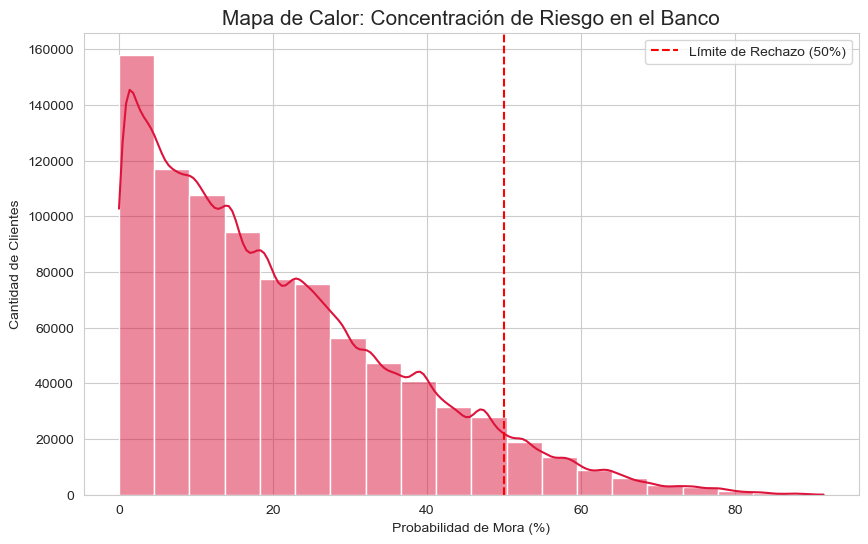

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_modelo['Probabilidad_Falla_%'], bins=20, kde=True, color='crimson')

plt.title('Mapa de Calor: Concentración de Riesgo en el Banco', fontsize=15)
plt.xlabel('Probabilidad de Mora (%)')
plt.ylabel('Cantidad de Clientes')
plt.axvline(50, color='red', linestyle='--', label='Límite de Rechazo (50%)')
plt.legend()
plt.show()

In [9]:
# 1. Traemos un dataset mucho más rico de SQL
query_pro = """
SELECT c.Edad, c.Ingreso_Anual, c.Situacion_Vivienda, c.Tiempo_Trabajando,
       p.Motivo_Prestamo, p.Monto_Prestamo, p.Tasa_Interes, p.Estado_Mora
FROM Clientes c
JOIN Prestamos p ON c.ClienteID = p.ClienteID
"""
df_pro = pd.read_sql(query_pro, conn)

# 2. Convertimos las palabras en columnas numéricas (Dummies)
# Esto crea columnas como 'Situacion_Vivienda_RENT', 'Motivo_Prestamo_MEDICAL', etc.
df_final = pd.get_dummies(df_pro, columns=['Situacion_Vivienda', 'Motivo_Prestamo'])

# 3. Limpiamos valores nulos (la Tasa de Interés a veces tiene nulos)
df_final = df_final.fillna(0)

# 4. Definimos X (todas las columnas menos el resultado) y y (Estado_Mora)
X = df_final.drop('Estado_Mora', axis=1)
y = df_final['Estado_Mora']

# 5. Entrenamos el Forest Pro
modelo_forest_pro = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_forest_pro.fit(X, y)

print("✅ Modelo Forest entrenado con éxito usando variables categóricas y numéricas.")

C:\Users\ignac\AppData\Local\Temp\ipykernel_20692\3172484881.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pro = pd.read_sql(query_pro, conn)


✅ Modelo Forest entrenado con éxito usando variables categóricas y numéricas.


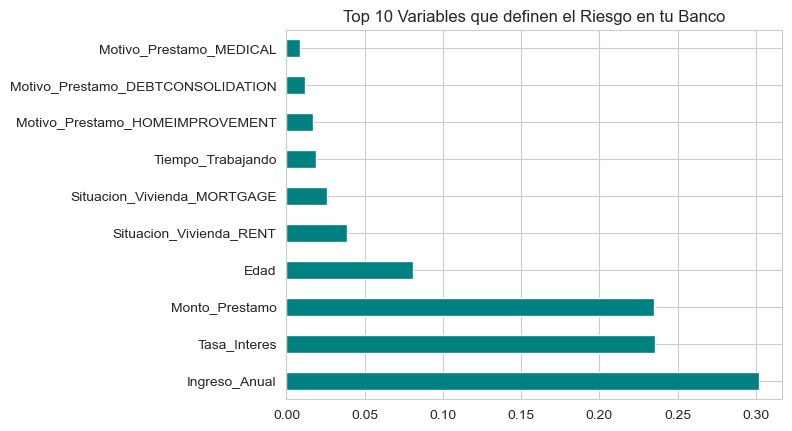

In [10]:
# Graficamos la importancia de las variables
importancias = pd.Series(modelo_forest_pro.feature_importances_, index=X.columns)
importancias.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Variables que definen el Riesgo en tu Banco')
plt.show()

In [11]:
# 1. Calculamos la probabilidad de mora para cada cliente usando el Bosque (Forest)
# Esto nos da un número del 0 al 100 para cada fila
predicciones_prob = modelo_forest_pro.predict_proba(X)[:, 1]
df_pro['Probabilidad_Mora_%'] = (predicciones_prob * 100).round(2)

# 2. Clasificamos a los clientes según el nuevo modelo de ML
def clasificar_ml(prob):
    if prob > 70: return 'ALTA: Acción Inmediata'
    if prob > 30: return 'MEDIA: Monitoreo'
    return 'BAJA: Cliente Confiable'

df_pro['Prioridad_Cobranza'] = df_pro['Probabilidad_Mora_%'].apply(clasificar_ml)

# 3. Guardamos el TOP 100 de clientes más riesgosos en un Excel
top_riesgo = df_pro.sort_values(by='Probabilidad_Mora_%', ascending=False).head(100)
top_riesgo.to_excel('Analisis_Riesgo_Final_ML.xlsx', index=False)

print("✅ ¡Éxito total!")
print(f"Se ha generado el archivo 'Analisis_Riesgo_Final_ML.xlsx' con los {len(top_riesgo)} perfiles más críticos.")

✅ ¡Éxito total!
Se ha generado el archivo 'Analisis_Riesgo_Final_ML.xlsx' con los 100 perfiles más críticos.


In [12]:
# Guardar el resultado final para enviárselo al "equipo de cobranzas"
df_final_resultados = df_pro.copy()
df_final_resultados['Probabilidad_Mora_%'] = (modelo_forest_pro.predict_proba(X)[:, 1] * 100).round(2)

# Exportar a Excel (este archivo lo subes a tu carpeta 'datos' en GitHub)
df_final_resultados.to_excel('Resultado_Prediccion_Riesgo.xlsx', index=False)
print("✅ Archivo listo para el portfolio.")

✅ Archivo listo para el portfolio.


🎯 Precisión Total del Modelo: 99.99%

📝 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141554
           1       1.00      1.00      1.00     36413

    accuracy                           1.00    177967
   macro avg       1.00      1.00      1.00    177967
weighted avg       1.00      1.00      1.00    177967



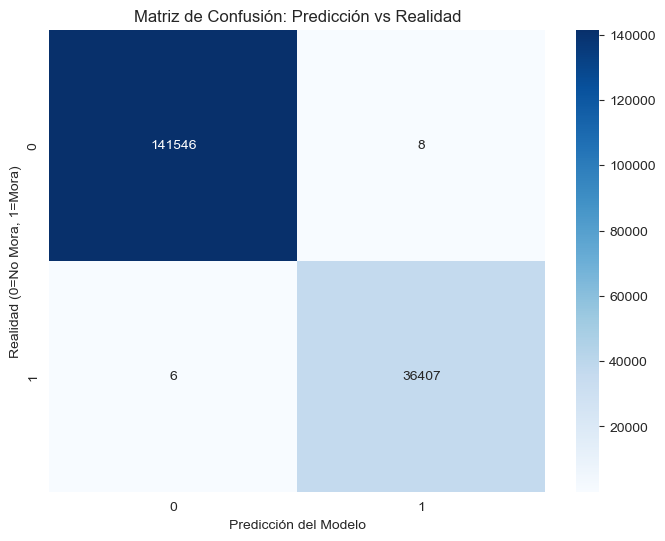

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dividimos los datos: 80% para entrenar y 20% para evaluar (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Re-entrenamos el modelo con el set de entrenamiento
modelo_eval = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_eval.fit(X_train, y_train)

# 3. Realizamos predicciones sobre el set de prueba (datos que el modelo nunca vio)
y_pred = modelo_eval.predict(X_test)

# 4. Calculamos la precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Precisión Total del Modelo: {accuracy*100:.2f}%")
print("\n📝 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 5. Visualizamos la Matriz de Confusión
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión: Predicción vs Realidad')
plt.ylabel('Realidad (0=No Mora, 1=Mora)')
plt.xlabel('Predicción del Modelo')
plt.show()